In [22]:
import pandas as pd #파이썬 데이터 분석 라이브러리
import numpy as np #수학 라이브러리
import matplotlib.pyplot as plt #시각화 라이브러리
import seaborn as sns #시각화 라이브러리
import xgboost as xgb #XGBoost
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

#원데이터에서 전처리를 할 수 있는 기능을 담아둔 라이브러리
from sklearn import preprocessing

#자체 내장된 데이터셋을 불러오거나, 각종 데이터를 만들수 있게 해주는 라이브러리
from sklearn import datasets

from sklearn import tree #의사결정나무
from sklearn.ensemble import VotingClassifier #하드보팅, 소프트보팅 라이브러리

#평가 지표를 한눈에 볼수 있게 해주는 라이브러리
from sklearn.metrics import classification_report

#각종 평가 지표 라이브러리
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

#GridSearch를 통해 최적의 파라미터를 찾아냄, KFold를 통해 최적의 학습을 하게 함. 
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score

#테스트 데이터와 검증용 데이터를 나눠줄 수 있게 해주는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #가우시안 나이브 베이즈

#스케일링 라이브러리
from sklearn.preprocessing import MinMaxScaler #최대/최소값이 1, 0이 되는 스케일링

#L1, L2, Max 정규화를 해주는 스케일링
#L1 norm: 맨해튼 거리(각 벡터들의 거리(절대값) 합
#L2 norm: 유클리드 공간(좌표평면에서의 거리) 합
from sklearn.preprocessing import Normalizer

#중앙값과 사분위값 사용, 이상치 영향 최소화
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC

#XGBoost를 사용시 Feature Importance를 불러오기 위함
from xgboost import plot_importance
from xgboost import XGBClassifier #XGBoost 분류기

#사이킷런의 패키지로 가상의 분류모형 데이터를 생성해주는 라이브러리
from sklearn.datasets import make_classification

#다양한 변수들을 해당 변수(1)vs나머지(0) 변수 형태로 비교하는 라이브러리
from sklearn.preprocessing import label_binarize

#다변수를 하나씩 나머지 변수들과 비교할 수 있는 라이브러리
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

# 데이터 읽어오기
train = pd.read_csv("../open2/train2.csv")
# 수집된 데이터 샘플 확인
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,0,1,1,2,17,1,1,0,0,0,2.0,1,1.0
1,1,0,0,1,1,0,0,4,0,1,14,1,1,0,0,1,3.0,0,1.0
2,2,1,1,1,0,1,4,1,1,1,5,1,1,0,1,0,2.0,6,2.0
3,3,0,0,1,0,0,0,4,1,1,18,1,1,0,1,0,2.0,9,0.0
4,4,0,1,1,0,0,2,1,1,1,18,1,1,0,0,0,2.0,7,2.0


In [2]:
# 데이터 기본적인 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  int64  
 2   car            26457 non-null  int64  
 3   reality        26457 non-null  int64  
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  int64  
 6   income_type    26457 non-null  int64  
 7   edu_type       26457 non-null  int64  
 8   family_type    26457 non-null  int64  
 9   house_type     26457 non-null  int64  
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  int64  
 18  credit

In [3]:
# 데이터 개수, 평균, 최소, 최고값 등 확인
train.describe()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.331103,0.379748,0.673924,0.410024,0.203009,2.394754,3.097592,1.367275,1.279813,10.751748,0.832256,1.0,0.224742,0.294251,0.091280,2.196848,5.186794,1.519560
std,7637.622372,0.470619,0.485333,0.468784,0.669604,0.462318,1.735900,1.341602,0.952536,0.944273,5.692083,0.373646,0.0,0.417420,0.455714,0.288013,0.916717,3.418258,0.702283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6614.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000
50%,13228.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,4.000000,1.000000,1.000000,12.000000,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,5.000000,2.000000
75%,19842.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,4.000000,1.000000,1.000000,16.000000,1.000000,1.0,0.000000,1.000000,0.000000,3.000000,8.000000,2.000000
max,26456.000000,1.000000,1.000000,1.000000,2.000000,6.000000,4.000000,4.000000,4.000000,5.000000,19.000000,1.000000,1.0,1.000000,1.000000,1.000000,20.000000,11.000000,2.000000


In [4]:
# 현재 데이터에서 신용등급의 개수를 확인
train.credit.value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

Text(0.5, 1.0, 'reality and car in 2d plane')

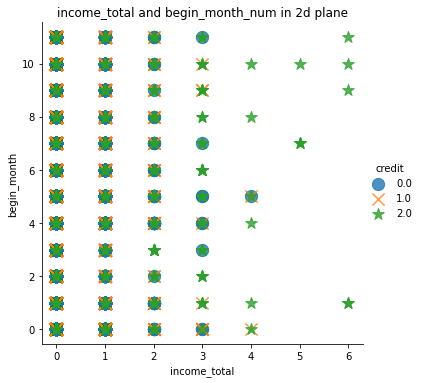

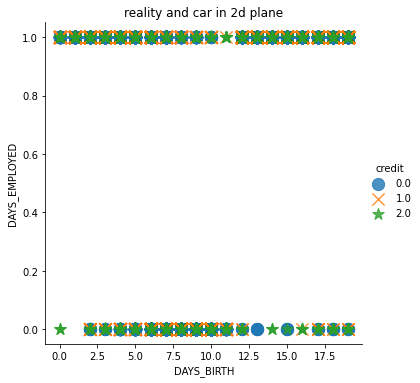

In [15]:
#컬럼의 관계 도출을 위한 테스트
# x축, y축, 데이터, 라인 경계는 지움
sns.lmplot('income_total', 'begin_month', data=train, fit_reg=False,
           scatter_kws={"s":150}, # 좌표 상의 점의 크기
           markers=["o", "x", "*"], #그래프 상 범례의 표시 모양
          hue="credit") # 예측값
# 타이틀
plt.title('income_total and begin_month_num in 2d plane')

sns.lmplot('DAYS_BIRTH', 'DAYS_EMPLOYED', data=train, fit_reg=False, 
           scatter_kws={"s":150},
           markers=["o", "x", "*"],
          hue="credit")

plt.title('reality and car in 2d plane')

In [17]:
# 신용도(Credit) 상관관계가 적은 컬럼들 삭제하여 상관관계 분석
train2 = train.drop(['index','gender','car','reality','FLAG_MOBIL','phone','email','work_phone'], axis=1)
train2

,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,credit
0,0,0,0,1,1,2,17,1,2.0,1,1.0
1,1,0,0,4,0,1,14,1,3.0,0,1.0
2,0,1,4,1,1,1,5,1,2.0,6,2.0
3,0,0,0,4,1,1,18,1,2.0,9,0.0
4,0,0,2,1,1,1,18,1,2.0,7,2.0
...,...,...,...,...,...,...,...,...,...,...,...
26452,2,0,2,4,1,1,15,1,4.0,0,1.0
26453,1,0,4,1,2,1,18,1,2.0,11,2.0
26454,0,1,4,4,0,5,12,1,2.0,6,2.0
26455,0,0,4,2,3,1,12,1,1.0,3,2.0


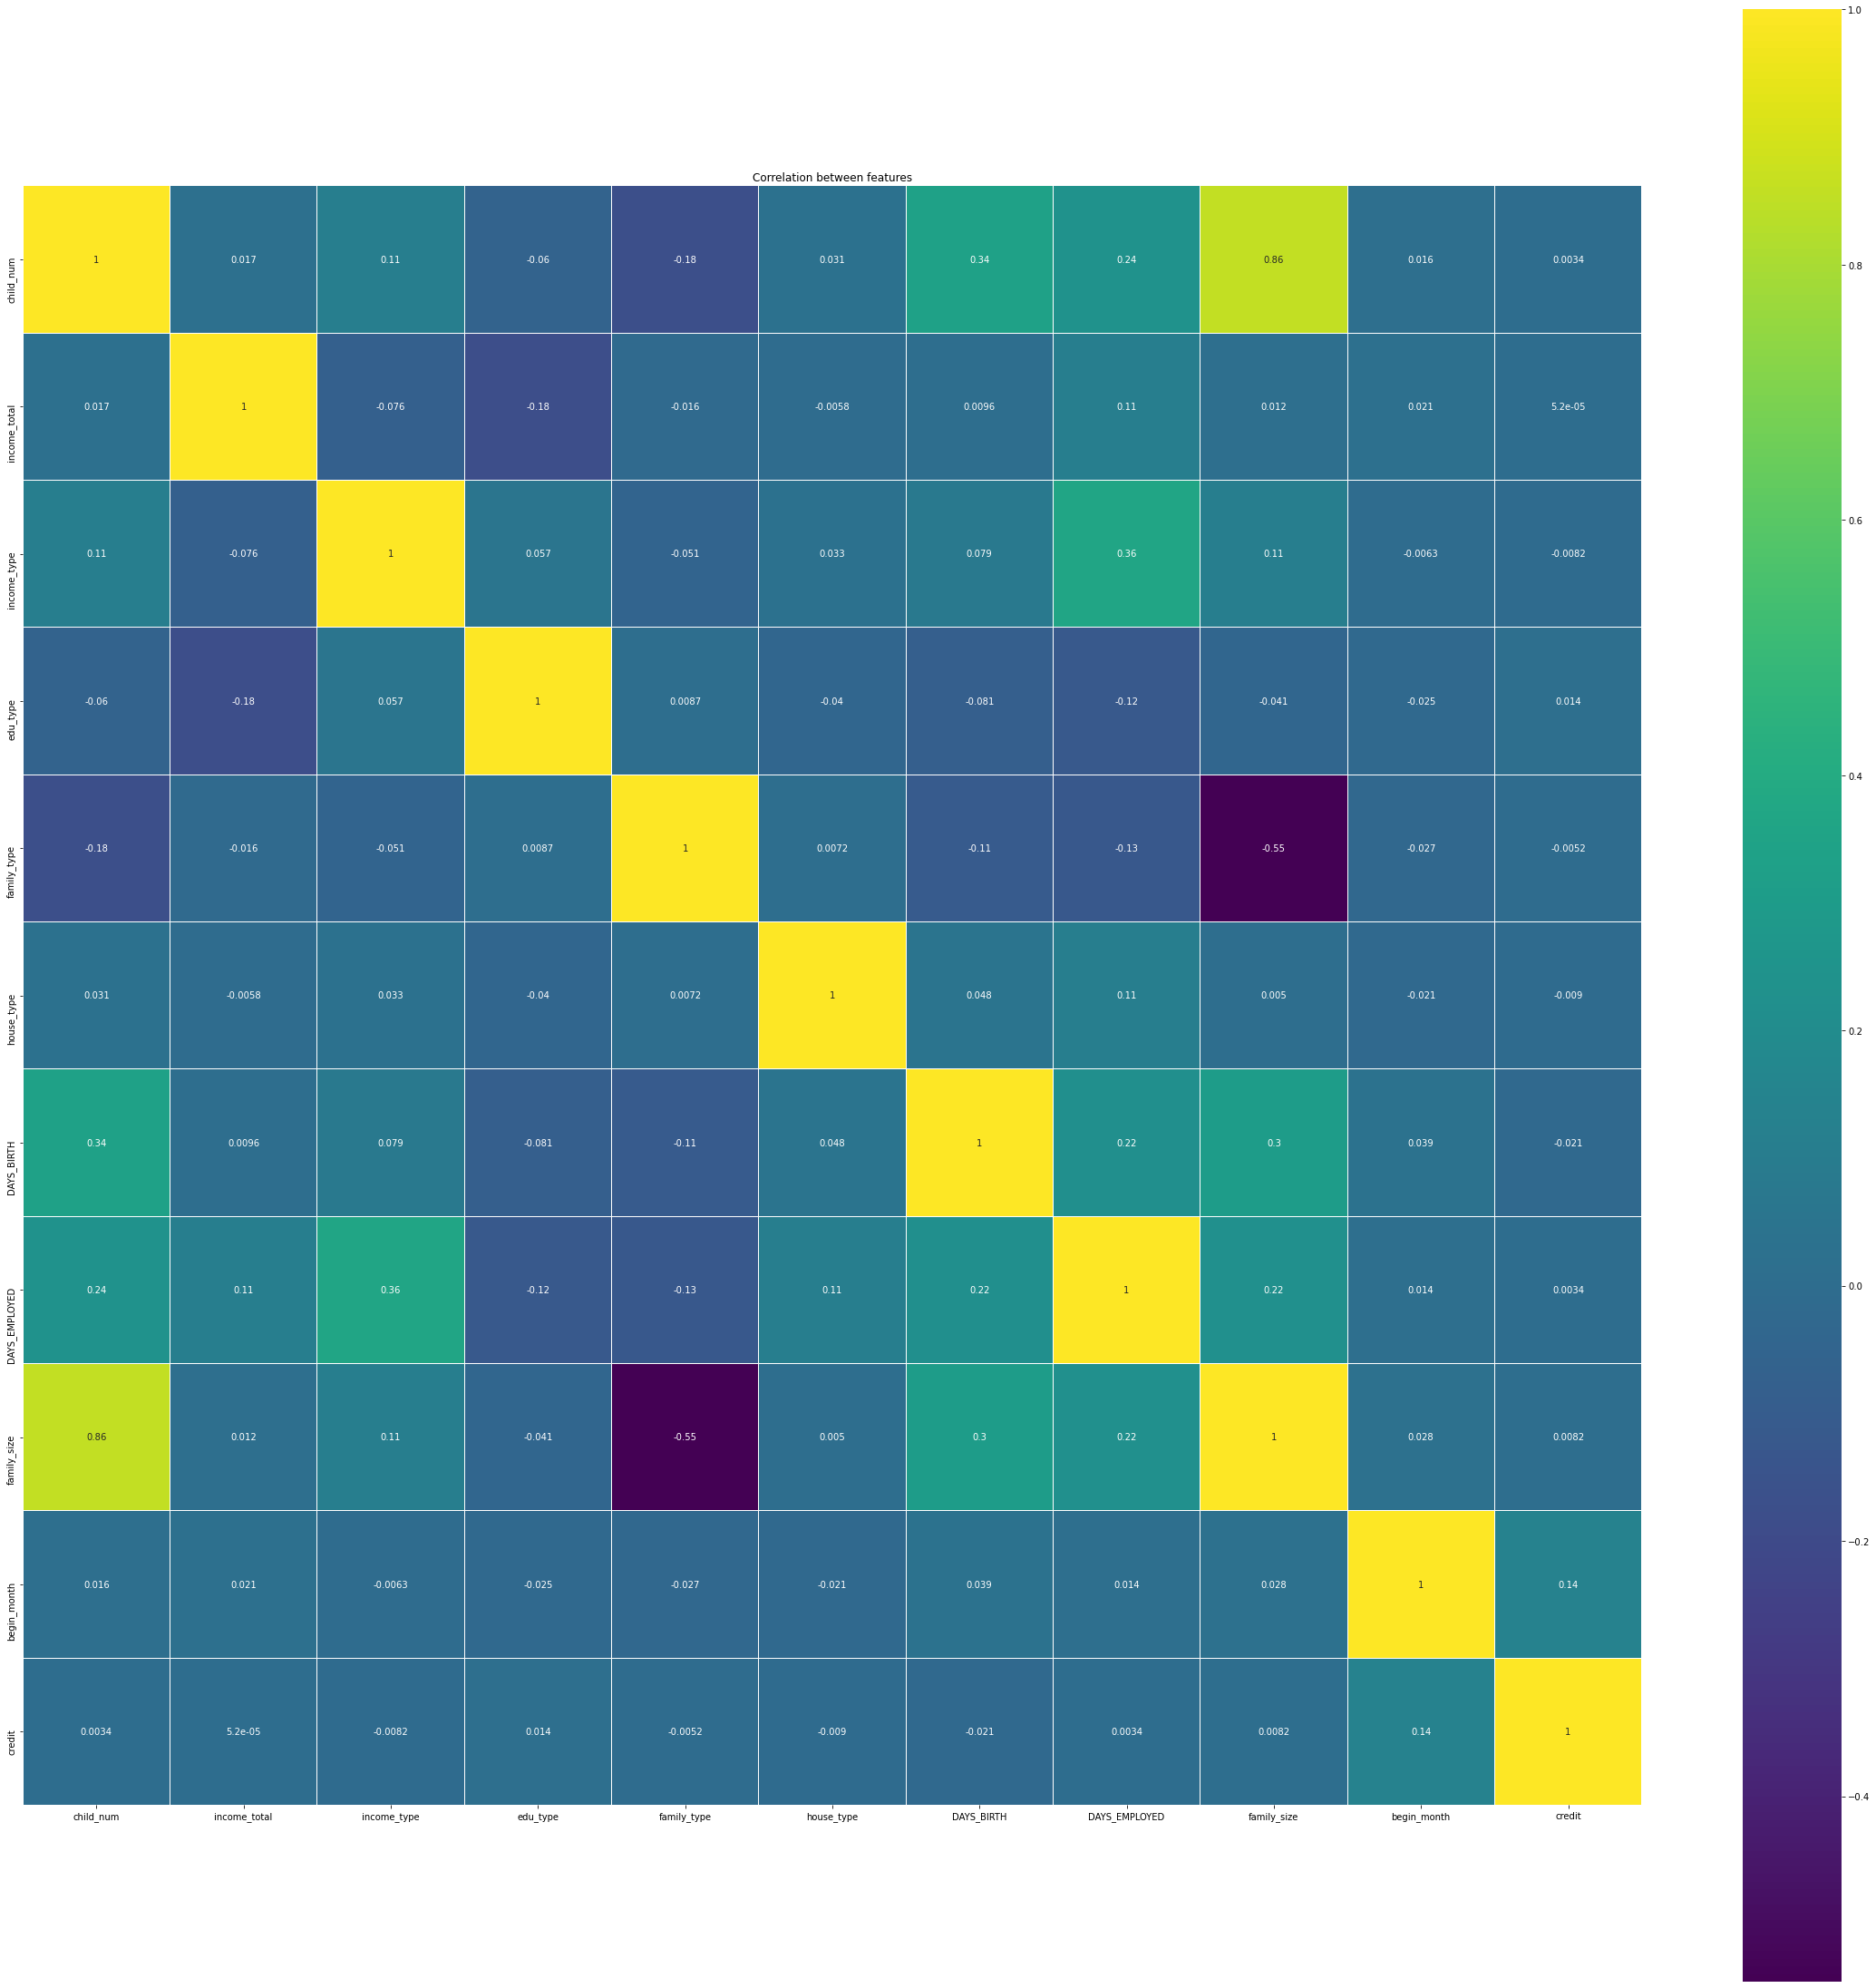

In [18]:
# 변수간 상관관계 확인
plt.figure(figsize=(40, 40))  # figure size 생성
sns.heatmap(train2.corr(), linewidths=0.01, square=True,  # squre = 정사각형 , lindewidths = 사각형간 폭
            annot=True, cmap=plt.cm.viridis, linecolor="white")  #annot = 사각형내부 숫자표기, cmap = 색반전
plt.title('Correlation between features')
plt.show()

In [19]:
train2.corr()  # 각 항목들의 상관도를 구해줌(-1 ~ 1사이)

,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,credit
child_num,1.000000,0.016577,0.108831,-0.060029,-0.175368,0.030583,0.339653,0.244999,0.860830,0.015749,0.003441
income_total,0.016577,1.000000,-0.075698,-0.179422,-0.015504,-0.005790,0.009600,0.107209,0.012105,0.021353,0.000052
income_type,0.108831,-0.075698,1.000000,0.056688,-0.050790,0.033013,0.079155,0.360725,0.107698,-0.006318,-0.008163
edu_type,-0.060029,-0.179422,0.056688,1.000000,0.008717,-0.039668,-0.080656,-0.121542,-0.041345,-0.025240,0.013780
family_type,-0.175368,-0.015504,-0.050790,0.008717,1.000000,0.007189,-0.110266,-0.125216,-0.545149,-0.027340,-0.005230
house_type,0.030583,-0.005790,0.033013,-0.039668,0.007189,1.000000,0.047538,0.107004,0.005010,-0.021428,-0.009023
DAYS_BIRTH,0.339653,0.009600,0.079155,-0.080656,-0.110266,0.047538,1.000000,0.221323,0.303256,0.038673,-0.021176
DAYS_EMPLOYED,0.244999,0.107209,0.360725,-0.121542,-0.125216,0.107004,0.221323,1.000000,0.223751,0.014264,0.003429
family_size,0.860830,0.012105,0.107698,-0.041345,-0.545149,0.005010,0.303256,0.223751,1.000000,0.027541,0.008227
begin_month,0.015749,0.021353,-0.006318,-0.025240,-0.027340,-0.021428,0.038673,0.014264,0.027541,1.000000,0.142109


# 이산형 변수 확인

In [2]:
#사이킷런의 train_test_split을 사용, 데이터 나누기
from sklearn.model_selection import train_test_split
# 다듬어진 데이터에서 10%를 테스트 데이터로 분류
train_set, test_set = train_test_split(train, test_size=0.1)

In [21]:
#학습용 데이터 개수
train_set.shape[0]

23811

In [22]:
#평가용 데이터 개수
test_set.shape[0]

2646

In [3]:
#스케일 적용, 0 ~ 1 사이 값으로 변환하여 정확도를 향상시킬 것으로 기대
scaler = MinMaxScaler()

# 테스트 데이터에서 분류를 위해 사용될 속성을 지정
#여기에 분별력이 있는 컬럼들을 써줘야 한다.
#학습은 x값으로
x_train = train_set[['gender', 'car', 'reality', 'edu_type', 'family_type', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                  'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'income_type', 'begin_month', 'house_type']]
#정답은 y값으로
y_train = train_set[['credit']]

#x값을 스케일링
x_train_scale = scaler.fit_transform(x_train)


x_test = test_set[['gender', 'car', 'reality', 'edu_type', 'family_type', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                  'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'income_type', 'begin_month', 'house_type']]

y_test = test_set[['credit']]

x_test_scale = scaler.fit_transform(x_test)

In [31]:
# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 학습 데이터 절반까지 지정
max_k_range = train_set.shape[0] // 2

#정확도 값을 저장하기 위한 리스트 초기화
k_list = []

#학습 범위는 max_k_range에서 2000개 잘라서 리스트 작성
for i in range(2000, max_k_range, 2000):
    k_list.append(i)
    
cross_validation_scores = []


# 교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k) #KNN 분류기 사용, k번 학습 반복
    
    #단순 교차검증의 파라미터: (모델명, 훈련데이터, 타깃(정답), cv=폴드 수)
    scores = cross_val_score(knn, x_train_scale, y_train.values.ravel(), cv=10,
                              scoring='accuracy') #scoring은 출력항목
    cross_validation_scores.append(scores.mean()) #교차검증 값의 평균을 출력
    
cross_validation_scores

[0.6423501756665118,
 0.6423501756665118,
 0.6423501756665118,
 0.6423501756665118,
 0.6423501756665118]

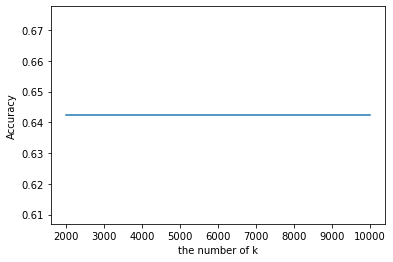

In [32]:
# k에 따른 정확도를 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [33]:
# 가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index
           (max(cross_validation_scores))]
print("The best number of k : " + str(k))

The best number of k : 2000


In [34]:
# KNN에 스케일링된 학습 데이터셋과 
# 정답 레이블을 만든 데이터셋을 대응하여 저장
knn.fit(x_train_scale, y_train.values.ravel())

# 스케일링된 테스트 데이트를 예측하고 저장
pred = knn.predict(x_test_scale)

# 모델 예측 정확도 출력
print("accuracy : " + 
      str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.6322751322751323


In [36]:
# KNN 학습방법을 이용하여 
# test-set의 값을 예측하여 정답과 함께 표시
comparison = pd.DataFrame(
    {'prediction':pred, 
     'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,2.0,2.0
1,2.0,2.0
2,2.0,1.0
3,2.0,1.0
4,2.0,0.0
...,...,...
2641,2.0,2.0
2642,2.0,1.0
2643,2.0,2.0
2644,2.0,1.0


# 서포트 벡터 머신(SVM)

In [23]:
def svc_param_selection(x, y, nfolds):

# SVM(Support Vector Machine) 변수
#   Radial Basis Function(방사형 기저 함수) 
#   커널에서는 C, gamma변수가 필요

# (RBF)방사형 기저 함수
#   예측 변수의 값을 기준으로 
#   하나 이상의 종속변수에 대한 예측 모형

# C(Cost): 얼마나 많은 데이터 샘플이 
#         다른 클래스에 놓이는 것을 허용하는지

# gamma: 하나의 데이터 샘플이 영향력을 행사하는 
#       거리를 결정, 값이 커질수록 거리는 짧아짐

    svm_parameters = [
                        {'kernel' : ['rbf'],
                         'gamma': [0.01, 0.1, 1],
                         'C': [10, 100, 1000]}
                     ]
    
    # sklearn 라이브러리의
    # GridSearchCV 패키지 사용하여 최적의 파라미터를 구함
    clf = GridSearchCV(SVC(), svm_parameters, cv=5)
    clf.fit(x_train, y_train.values.ravel())
    print(clf.best_params_)

    return clf

# 최적의 파라미터로 학습된 모델을 classifier로 저장
clf = svc_param_selection(x_train, y_train.values.ravel(), 5)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [14]:
# x_test = test_set[['gender', 'car', 'reality', 'edu_type', 'family_type', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
#                   'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'income_type',
#                   'begin_month', 'house_type']]
# y_test = test_set[['credit']]

# 최적의 파라미터로 학습된 모델로 테스트를 진행
y_true, y_pred = y_test, clf.predict(x_test)

# 평가 지표를 확인하기 위해 classification_report 함수 사용
print(classification_report(y_true, y_pred))
print()
print("accuracy : " + str(accuracy_score(y_true, y_pred)) )

# macro : 라벨 별(Credit) 각 합의 평균
#         (0확률 평균 + 1확률 평균 + 2확률평균 / 3) - 평균의 평균

# weighted : 가중치 평균, 라벨(Credit) 0 1 2 별 가중치 값이 나왔을 때 
#            0의 가중치 + 1의 가중치 + 2의 가중치 / 3

              precision    recall  f1-score   support

         0.0       0.27      0.33      0.30       311
         1.0       0.42      0.43      0.42       644
         2.0       0.74      0.70      0.72      1691

    accuracy                           0.59      2646
   macro avg       0.48      0.49      0.48      2646
weighted avg       0.61      0.59      0.60      2646


accuracy : 0.5925925925925926


In [15]:
# SVM 학습방법을 이용하여 
# test-set의 값을 예측하여 정답과 함께 표시
comparison2 = pd.DataFrame(
    {'prediction':y_pred,
     'ground_truth':y_true.values.ravel()})
comparison2

,prediction,ground_truth
0,1,1.0
1,1,2.0
2,0,1.0
3,2,2.0
4,2,2.0
...,...,...
2641,0,2.0
2642,2,1.0
2643,1,1.0
2644,2,2.0


In [16]:
train_DT = pd.DataFrame(train_set)
train_DT = train_set[['gender', 'car', 'reality', 'child_num', 'income_total', 
                      'income_type', 'edu_type', 'family_type', 'house_type',
                      'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone',
                      'phone', 'email', 'family_size', 'begin_month', 'credit']]

test_DT = pd.DataFrame(test_set)
test_DT = test_set[['gender', 'car', 'reality', 'child_num', 'income_total', 
                      'income_type', 'edu_type', 'family_type', 'house_type',
                      'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone',
                      'phone', 'email', 'family_size', 'begin_month', 'credit']]

In [17]:
train_DT.credit.value_counts()

2.0    15277
1.0     5623
0.0     2911
Name: credit, dtype: int64

In [18]:
test_DT.credit.value_counts()

2.0    1691
1.0     644
0.0     311
Name: credit, dtype: int64

In [19]:
train_DT.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
1739,0,1,0,2,0,4,1,0,2,13,1,1,1,1,0,4.0,10,2.0
9983,1,0,0,1,0,2,4,1,1,17,1,1,0,0,0,3.0,10,2.0
8612,0,0,1,0,1,1,4,3,1,9,0,1,0,0,0,1.0,0,0.0
6958,1,1,0,1,0,4,4,1,1,13,1,1,0,0,0,3.0,4,2.0
15759,1,0,1,0,0,4,4,1,1,19,1,1,0,1,0,2.0,0,2.0


In [31]:
x_DTtrain = train_DT[['gender', 'car', 'reality', 'child_num', 'income_total', 
                      'income_type', 'edu_type', 'family_type', 'house_type',
                      'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone',
                      'phone', 'email', 'family_size', 'begin_month']]
y_DTtrain = train_DT[['credit']]

x_DTtest = test_DT[['gender', 'car', 'reality', 'child_num', 'income_total', 
                      'income_type', 'edu_type', 'family_type', 'house_type',
                      'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone',
                      'phone', 'email', 'family_size', 'begin_month']]
y_DTtest = test_DT[['credit']]

# 의사결정나무

In [27]:
# 의사결정나무(DecisionTree):
# 목적과 자료기준에 따라 분리기준과 정지규칙을 
# 지정하여 의사결정나무를 얻는 알고리즘.

# 한 번의 분기 때마다 변수 영역을 두개로 구분
# 기본 개념은 Leaf Node가 섞이지 않는 상태로 완전히 분류되는 것,

# 즉, 복잡성(entropy)이 낮도록 만드는 것.

# 분리기준: 부모마디 대비 자식마디에서 순수도가 증가하는 정도

# 정지규칙: 더 이상 분리가 일어나지 않음

# 가지치기: 적절하지 않은 마디 제거

# preprocessing 라이브러리에서 
# 라벨값 입력해주는 함수를 불러옴.(0 ~ 항목의 갯수-1)
# 라벨값을 부여해야 의사결정나무에서 기준 설정 가능
le = preprocessing.LabelEncoder()

# fit_transform 함수를 통해 데이터셋을
# 명목형 데이터셋으로 스케일링하고 학습시킬 수 있음
y_encoded = le.fit_transform(y_train)

# 의사결정나무(랜덤 시드값 5) 생성, 
# 학습데이터의 x, y를 대응시킨 후 학습
clf = tree.DecisionTreeClassifier(random_state=5).fit(x_train, y_encoded)

In [32]:
import graphviz
#DOT(그래프 기술 언어) 형태로 추출
dot_data = tree.export_graphviz(clf, out_file=None)

#추출된 DOT 데이터를 시각화
graph = graphviz.Source(dot_data)

#타겟(신용등급)을 목표로 의사결정나무 파일을 만들어준다.
graph.render("credit")
dot_data = tree.export_graphviz(clf, out_file=None,
            feature_names = ['gender', 'car', 'reality', 'child_num', 
                             'income_total', 'income_type', 'edu_type',
                             'family_type', 'house_type', 'DAYS_BIRTH',
                             'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone',
                             'phone', 'email', 'family_size', 'begin_month', 
                             'credit'],
            class_names=['0', '1', '2'],
            filled=True, rounded=True,
            special_characters=True)

graph = graphviz.Source(dot_data)
graph

ModuleNotFoundError: No module named 'graphviz'

In [34]:
pred = clf.predict(x_DTtest)

In [35]:
print("accuracy : " + str(
    accuracy_score(y_test.values.ravel(),
                   le.classes_[pred])))

accuracy : 0.3767951625094482


In [36]:
#의사결정나무를 학습방법을 이용하여 test-set의 값을 예측하여 정답과 함께 표시
comparison3 = pd.DataFrame(
    {'prediction':le.classes_[pred],
     'ground_truth':y_DTtest.values.ravel()})
comparison3

,prediction,ground_truth
0,2.0,1.0
1,2.0,2.0
2,1.0,1.0
3,0.0,2.0
4,2.0,2.0
...,...,...
2641,0.0,2.0
2642,1.0,1.0
2643,2.0,1.0
2644,2.0,2.0


In [37]:
# 의사결정나무를 이용한 랜덤포레스트 추가
# 의사결정나무가 가진 오버피팅 단점을 해결
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

NameError: name 'RandomForestClassifier' is not defined

In [9]:
pred = clf.predict(x_test)

In [12]:
print("accuracy : " + str(accuracy_score(y_test, pred)))

accuracy : 0.5925925925925926


In [ ]:
# 랜덤포레스트 학습방법을 이용하여 
# test-set의 값을 예측하여 정답과 함께 표시
comparison4 = pd.DataFrame(
    {'prediction':pred,
     'ground_truth':y_test.values.ravel()})
comparison4

In [ ]:
#랜덤포레스트 학습방법을 이용하여 test-set의 값을 예측하여 정답과 함께 표시
comparison4 = pd.DataFrame({'prediction':pred,
                           'ground_truth':y_test.values.ravel()})
comparison4

#XGBoost

In [138]:
x = train.drop(['credit'], axis=1)
y = train['credit']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state = 10086)
print(X_train.shape, X_test.shape)

(23811, 18) (2646, 18)


#XGBoost의 정확도 계산

In [139]:
#XGBoost의 분류기 사용, 횟수는 500회, 학습률은 0.2, 차수는 4
xgb_classifier = XGBClassifier(n_estimator=500, learning_rate=0.2, max_depth=4)
xgb_classifier.fit(X_train, Y_train)
xgb_pred = xgb_classifier.predict(X_test)

[16:42:29] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:42:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [140]:
#예측한 값을 정답과 비교
accuracy_score(Y_test, xgb_pred)

0.6462585034013606

In [141]:
classification_report(Y_test, xgb_pred, target_names=['0', '1', '2'])

'              precision    recall  f1-score   support\n\n           0       1.00      0.00      0.01       306\n           1       0.50      0.05      0.09       636\n           2       0.65      0.99      0.78      1704\n\n    accuracy                           0.65      2646\n   macro avg       0.72      0.35      0.29      2646\nweighted avg       0.65      0.65      0.53      2646\n'

[17:14:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


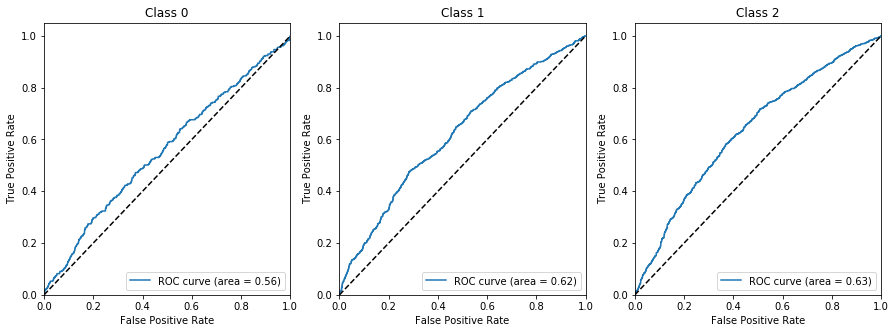

roc_auc_score:  0.6031106478810117


In [161]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

n_classes = 3
#샘플 데이터 만들기
a = train.drop(['credit'], axis=1)
b = train['credit']
# a, b = make_classification(n_samples=50, n_features=17,
#                           n_informative=3, n_redundant=2,
#                           n_clusters_per_class=2,
#                           n_classes=n_classes,
#                           weights=[0.3, 0.2, 0.5],
#                           random_state=99)

b = label_binarize(b, classes=[0, 1, 2])

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.1)

ovrclf = OneVsRestClassifier(XGBClassifier())
ovrclf.fit(a_train, b_train)
b_score = ovrclf.predict_proba(a_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(b_test[:, i], b_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(15, 5))

for idx, i in enumerate(range(n_classes)):
    plt.subplot(131 + idx)
    plt.plot(fpr[i], tpr[i], label = 'ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc = "lower right")

plt.show()

print("roc_auc_score: ", roc_auc_score(b_test, b_score, multi_class='raise'))


In [ ]:
xgb_Classifier = XGBClassifier()

xgb_param_grid = {
    'n_estimators' : [20, 40, 60, 80, 100],
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth' : [4, 6, 8, 10, 12],
}

xgb_grid = GridSearchCV(xgb_Classifier, param_grid = xgb_param_grid, scoring="accuracy", n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, Y_train)

In [ ]:
print("최고 평균 정확도 : {0:.4f}".format(xgb_grid.best_score_))
print("최고의 파라미터 : ", xgb_grid.best_params_)

In [ ]:
cv_result_df = pd.DataFrame(xgb_grid.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)

In [ ]:
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

##sklearn이 아닌 파이썬 라이브러리를 활용한 XGBoost를 이용한 값 예측

In [146]:
dtrain = xgb.DMatrix(data=X_train, label = Y_train)
dtest = xgb.DMatrix(data=X_test, label=Y_test)

In [82]:
# max_depth = 4, 학습률은 0.2, 예제가 이진분류이므로 목적함수(objective)는 
# multi:softmax로 가장 확률이 높은 값 출력
# 오류함수의 변수가 2 이상이므로 평가성능지표는 mlogloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 4,
         'eta' : 0.2,
         'eval_metric' : 'mlogloss',
         'objective' : 'multi:softmax',
         'num_class' : 3,
         'early_stoppings' : 100 }

num_rounds = 400

In [147]:
#제출용 답안에 컬럼[0, 1, 2]의 모든 row을 0으로 초기화
sub=np.zeros((X_test.shape[0], 3))
    
wlist = [(dtrain, 'train'), (dtest,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

predictions = np.round(xgb_model.predict(dtest), 3)
sub = np.round(xgb_model.predict(dtest), 3)

[16:44:18] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-mlogloss:1.03050	eval-mlogloss:1.03166
[1]	train-mlogloss:0.98264	eval-mlogloss:0.98460
[2]	train-mlogloss:0.94844	eval-mlogloss:0.95134
[3]	train-mlogloss:0.92364	eval-mlogloss:0.92728
[4]	train-mlogloss:0.90558	eval-mlogloss:0.90987
[5]	train-mlogloss:0.89228	eval-mlogloss:0.89675
[6]	train-mlogloss:0.88256	eval-mlogloss:0.88753
[7]	train-mlogloss:0.87519	eval-mlogloss:0.88089
[8]	train-mlogloss:0.86965	eval-mlogloss:0.87583
[9]	train-mlogloss:0.86556	eval-mlogloss:0.87231
[10]	train-mlogloss:0.86239	eval-mlogloss:0.86995
[11]	train-mlogloss:0.85987	eval-mlogloss:0.86822
[12]	train-mlogloss:0.85793	eval-mlogloss:0.86694
[13]	train-mlogloss:0.856

[157]	train-mlogloss:0.79363	eval-mlogloss:0.85732
[158]	train-mlogloss:0.79322	eval-mlogloss:0.85725
[159]	train-mlogloss:0.79288	eval-mlogloss:0.85720
[160]	train-mlogloss:0.79254	eval-mlogloss:0.85719
[161]	train-mlogloss:0.79242	eval-mlogloss:0.85719
[162]	train-mlogloss:0.79220	eval-mlogloss:0.85736
[163]	train-mlogloss:0.79200	eval-mlogloss:0.85749
[164]	train-mlogloss:0.79178	eval-mlogloss:0.85747
[165]	train-mlogloss:0.79146	eval-mlogloss:0.85761
[166]	train-mlogloss:0.79123	eval-mlogloss:0.85756
[167]	train-mlogloss:0.79095	eval-mlogloss:0.85746
[168]	train-mlogloss:0.79071	eval-mlogloss:0.85754
[169]	train-mlogloss:0.79037	eval-mlogloss:0.85747
[170]	train-mlogloss:0.79010	eval-mlogloss:0.85738
[171]	train-mlogloss:0.78986	eval-mlogloss:0.85758
[172]	train-mlogloss:0.78957	eval-mlogloss:0.85773
[173]	train-mlogloss:0.78909	eval-mlogloss:0.85768
[174]	train-mlogloss:0.78871	eval-mlogloss:0.85756
[175]	train-mlogloss:0.78820	eval-mlogloss:0.85747
[176]	train-mlogloss:0.78782	ev

[318]	train-mlogloss:0.74700	eval-mlogloss:0.86058
[319]	train-mlogloss:0.74672	eval-mlogloss:0.86047
[320]	train-mlogloss:0.74629	eval-mlogloss:0.86025
[321]	train-mlogloss:0.74601	eval-mlogloss:0.86018
[322]	train-mlogloss:0.74574	eval-mlogloss:0.86034
[323]	train-mlogloss:0.74549	eval-mlogloss:0.86056
[324]	train-mlogloss:0.74525	eval-mlogloss:0.86064
[325]	train-mlogloss:0.74494	eval-mlogloss:0.86072
[326]	train-mlogloss:0.74476	eval-mlogloss:0.86079
[327]	train-mlogloss:0.74465	eval-mlogloss:0.86076
[328]	train-mlogloss:0.74446	eval-mlogloss:0.86080
[329]	train-mlogloss:0.74430	eval-mlogloss:0.86086
[330]	train-mlogloss:0.74396	eval-mlogloss:0.86080
[331]	train-mlogloss:0.74369	eval-mlogloss:0.86068
[332]	train-mlogloss:0.74337	eval-mlogloss:0.86059
[333]	train-mlogloss:0.74306	eval-mlogloss:0.86049
[334]	train-mlogloss:0.74276	eval-mlogloss:0.86056
[335]	train-mlogloss:0.74235	eval-mlogloss:0.86050
[336]	train-mlogloss:0.74212	eval-mlogloss:0.86048
[337]	train-mlogloss:0.74189	ev

In [148]:
print('predict() 수행 결과값을 10개 표시, 예측 확률 값으로 표시')
print(sub)

predict() 수행 결과값을 10개 표시, 예측 확률 값으로 표시
[2. 2. 2. ... 2. 0. 2.]


In [149]:
# XGBoost 학습방법을 이용하여 
# test-set의 값을 예측하여 정답과 함께 표시
comparison4 = pd.DataFrame(
    {'prediction':sub,
    'ground_truth':Y_test.values.ravel()})
comparison4

,prediction,ground_truth
0,2.0,2.0
1,2.0,2.0
2,2.0,1.0
3,2.0,2.0
4,2.0,2.0
...,...,...
2641,2.0,0.0
2642,1.0,2.0
2643,2.0,2.0
2644,0.0,0.0


In [ ]:
#가우시안 나이브 베이즈

In [150]:
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [151]:
expected = Y_test
predicted = model.predict(X_test)
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       306
         1.0       0.32      0.04      0.07       636
         2.0       0.65      0.97      0.78      1704

    accuracy                           0.64      2646
   macro avg       0.32      0.34      0.28      2646
weighted avg       0.49      0.64      0.52      2646



In [152]:
accuracy_score(Y_test, predicted)

0.636432350718065

In [153]:
#가우시안 나이브 베이즈 학습방법을 이용하여 test-set의 값을 예측하여 정답과 함께 표시
comparison5 = pd.DataFrame({'prediction':predicted,
                          'ground_truth':Y_test.values.ravel()})
comparison5

,prediction,ground_truth
0,2.0,2.0
1,2.0,2.0
2,2.0,1.0
3,2.0,2.0
4,2.0,2.0
...,...,...
2641,2.0,0.0
2642,2.0,2.0
2643,2.0,2.0
2644,2.0,0.0


#앙상블

In [128]:
dtree = tree.DecisionTreeClassifier(criterion="gini", max_depth=8,
                                   max_features=17, random_state=35)
dtree = dtree.fit(x_train, y_train)
dtree_predicted = dtree.predict(x_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(x_train, y_train)
knn_predicted = knn.predict(x_test)

svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(x_train, y_train)
svm_predicted = svm.predict(x_test)
print("[accuracy]")
print("d-tree: ", accuracy_score(y_test, dtree_predicted))
print("knn   : ", accuracy_score(y_test, knn_predicted))
print("svm   : ", accuracy_score(y_test, svm_predicted))

[accuracy]
d-tree:  0.6118669690098262
knn   :  0.6118669690098262
svm   :  0.6118669690098262


In [129]:
svm_proba = svm.predict_proba(x_test)
print(svm_proba[0:2])

[[0.1263127  0.23373029 0.63995702]
 [0.12642144 0.21995392 0.65362464]]


In [135]:
#하드 보팅
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1,1,1], voting='hard').fit(x_train, y_train)

hard_voting_predicted = voting_clf.predict(x_test)
accuracy_score(y_test, hard_voting_predicted)

0.6118669690098262

In [136]:
#소프트 보팅
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1,1,1], voting='soft').fit(x_train, y_train)

soft_voting_predicted = voting_clf.predict(x_test)
accuracy_score(y_test, soft_voting_predicted)

0.6111111111111112

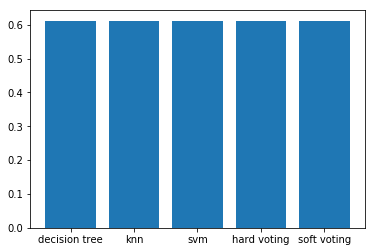

In [137]:
x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']);